In [2]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

In [3]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/Gabriels_experiments_STED/'
protein="TNR" #TNR,Agg,WFA,HABP

In [15]:
results = {"filename":[],
          "exp condition":[],
          "ecmchannelno":[],
          "synapsechannelno":[],
           "Manual syt spots mask":[]}
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "_analyse" in str(filelist[i]):
        print(1)
        if ("ocus" in str(filelist[i]))==False:
            print(2)
            if ("Pop" in str(filelist[i]))==False:
                print(3)
                if ("save" in str(filelist[i]))==False:
                    print(4)
                    if filelist[i].endswith(".tif"): 
                        print(5)
                        if str(filelist[i][:-12]) not in str(results["filename"]):
                            print(6)
                            results["filename"].append(filelist[i][:-12])
                            results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                            channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                            exec(open(channeldir+"/channels.txt").read())
                            results["ecmchannelno"].append(ecmchannelno)
                            results["synapsechannelno"].append(synapsechannelno)                                        

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6


## Loading a random image

Image name: 08_004_ExpControl
Experimental condition: 4hrs_DMSO


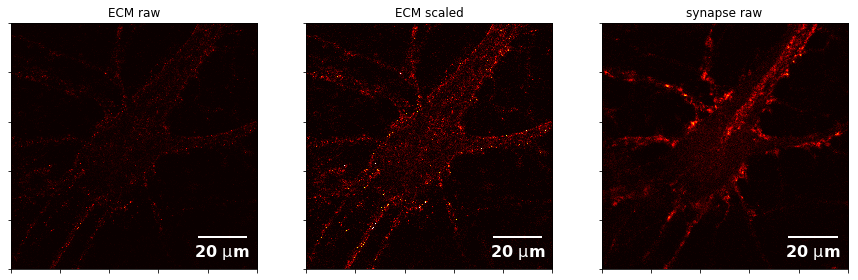

In [16]:
randomno=np.random.randint(1,len(results["filename"]))
ecm_channel_no=results["ecmchannelno"][randomno]
synapse_channel_no=results["synapsechannelno"][randomno]

ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
synapse_image_name=results["filename"][randomno]+" Ch"+str(synapse_channel_no)+" {0}.tif"

print("Image name:",results["filename"][randomno].split('/')[-1])
print("Experimental condition:",results["exp condition"][randomno])
ecm_image=pims.open(ecm_image_name)[0]
synapse_image=pims.open(synapse_image_name)[0]

figure=plt.figure(figsize=(15,15))
figure.add_subplot(131)
plt.imshow(ecm_image,interpolation='none',cmap='hot')
plt.title('ECM raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
figure.add_subplot(132)
plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(ecm_image))
plt.title('ECM scaled')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(133)
plt.imshow(synapse_image,interpolation='none',cmap='hot')
plt.title('synapse raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

## Find spots

### Manual

In [17]:
#make empty masks
for i in range(0,len(results["filename"])):
    results["Manual syt spots mask"].append(np.nan)

### For syt channel

In [34]:
import ipywidgets as widgets
from ipywidgets import interact
first=0

#load first image
synapse_channel_no=results["synapsechannelno"][first]
synapse_image_name=results["filename"][first]+" Ch"+str(synapse_channel_no)+" {0}.tif"


synapse_image=pims.open(synapse_image_name)[0]
synapse_spots=deepcopy(synapse_image)
synapse_spots=ndi.median_filter(synapse_spots,size=5)

lower_man_threshold=np.min(synapse_spots)
upper_man_threshold=np.max(synapse_spots)

def f(Threshold,Manual_Threshold,Open,Close,Image_no):
    
    ii=Image_no
    synapse_channel_no=results["synapsechannelno"][ii]
    synapse_image_name=results["filename"][ii]+" Ch"+str(synapse_channel_no)+" {0}.tif"

    synapse_image=pims.open(synapse_image_name)[0]
    
    synapse_spots=deepcopy(synapse_image)
    lower_man_threshold=np.min(synapse_spots)
    upper_man_threshold=np.max(synapse_spots)

    if Threshold=="Li":
        synapse_image_threshold=threshold_li(synapse_image)      
    if Threshold=="Otsu":
        synapse_image_threshold=threshold_otsu(synapse_image)
    if Threshold=="Manual":
        synapse_image_threshold=Manual_Threshold
    
    synapse_spots[synapse_spots<synapse_image_threshold]=0
    synapse_spots=ndi.binary_opening(synapse_spots,iterations=Open)
    synapse_spots=ndi.binary_closing(synapse_spots,iterations=Close)
    results["Manual syt spots mask"][ii]=synapse_spots
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(121)
    plt.imshow(synapse_spots)
    plt.imshow(synapse_image,alpha=0.5,cmap='inferno')
    fig.add_subplot(122)
    plt.imshow(synapse_image,cmap='inferno')
    

#widgets
Threshold=widgets.Dropdown(options=["Li","Otsu","Manual"])
Manual_Threshold=widgets.IntSlider(min=lower_man_threshold,max=upper_man_threshold,step=1,value=lower_man_threshold)
Open=widgets.IntText(min=0,max=20,step=1,value=1)
Close=widgets.IntText(min=0,max=20,step=1,value=1)
Image_no=widgets.IntText(min=0,max=len(results["filename"]),value=0)

w=interact(f,Threshold=Threshold,Manual_Threshold=Manual_Threshold,Open=Open,Close=Close,
           Image_no=Image_no)

interactive(children=(Dropdown(description='Threshold', options=('Li', 'Otsu', 'Manual'), value='Li'), IntSlid…

In [18]:
for i in range(0,len(results["filename"])):
    
    synapse_channel_no=results["synapsechannelno"][i]
    synapse_image_name=results["filename"][i]+" Ch"+str(synapse_channel_no)+" {0}.tif"


    synapse_image=pims.open(synapse_image_name)[0]
    synapse_spots=deepcopy(synapse_image)
    synapse_spots=ndi.median_filter(synapse_spots,size=5)
    synapse_image_threshold=threshold_otsu(synapse_image)
    synapse_spots[synapse_spots<synapse_image_threshold]=0
    synapse_spots=ndi.binary_opening(synapse_spots,iterations=10)
    synapse_spots=ndi.binary_closing(synapse_spots,iterations=7)
    results["Manual syt spots mask"][i]=synapse_spots
    #label images
    spots_mask=results["Manual syt spots mask"][i]
    spots_labeled, cc_num=ndi.label(spots_mask)
    #cut out ecm image 4microns around each spot - 200pixels
    print(cc_num)

169
121
56
109
154
187
140
133
87
117
159
128
142
79
245
84
126
95
164
194
264
81
164
82
211
170
121
274
99
128
59
59
42
72
84
55
102
155
167
144
122
35
130
113
131
99
55
130
94
116
61
164
232
122
67
99
114
159
249
120
72
87
197
99
68
156
91
131
127
225
95
72
135
136
152
158
158
170
151
258
113
72
67
191
253
85
68
86
158
82
109
83
90
130
132
105
72
80
129
156
0
72
58
82
86
70
118
136
135
198
99
57
185
152
103
78
98
70
75
87
109
114
63
135
80
85
60
141
95
83
49
96
20
114
121
106
114
169
92
66
149
64
220
138
104
89
76
129
86
170
26
128
108
61
140
153
121
107
166
139
116
69
127
94
77
151
160
127
99
71
199
171
126
108
89
242
94


### Backup manual spots for syt

In [19]:
for image in range(0,len(results["filename"])):
    np.save(results["filename"][image]+'_syt_spots_mask.npy',results["Manual syt spots mask"][image])